In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report

In [2]:
df = pd.read_csv(r"C:\Users\athud\OneDrive\Desktop\MSc\2nd Sem\Mini Project\Sample_data.csv")

In [3]:
df.head()

,Date,District,APMC_Name,Commodity,Arrival_Quantity_Qtl,Modal_Price_Rs_Qtl,Min_Price_Rs_Qtl,Max_Price_Rs_Qtl,Soil_Type,Water_Requirement,Season,Average_Yield_Tons_per_Ha,Typical_Costs_Rs_per_Ha,Export_Potential
0,29-04-2025,Pune,Pune APMC,Soybean,2400,4200,4000,4400,Loam,Medium,Kharif,2.2,45000,Medium
1,29-04-2025,Satara,Satara APMC,Pigeon Pea,1600,5200,5000,5400,Loam,Low,Kharif,1.8,35000,Low
2,29-04-2025,Nashik,Lasalgaon APMC,Onion,3200,1600,1400,1800,Sandy,Medium,Rabi,15.0,120000,High
3,29-04-2025,Pune,Pune APMC,Groundnut,1200,5000,4700,5300,Sandy,Medium,Kharif,2.5,60000,Medium


In [17]:
df.columns

Index(['Date', 'District', 'APMC_Name', 'Commodity', 'Arrival_Quantity_Qtl',
       'Modal_Price_Rs_Qtl', 'Min_Price_Rs_Qtl', 'Max_Price_Rs_Qtl',
       'Soil_Type', 'Water_Requirement', 'Season', 'Average_Yield_Tons_per_Ha',
       'Typical_Costs_Rs_per_Ha', 'Export_Potential', 'Estimated_Profit',
       'Price_SD'],
      dtype='object')

* Basic EDA
  
print(df.info())

print(df.describe())

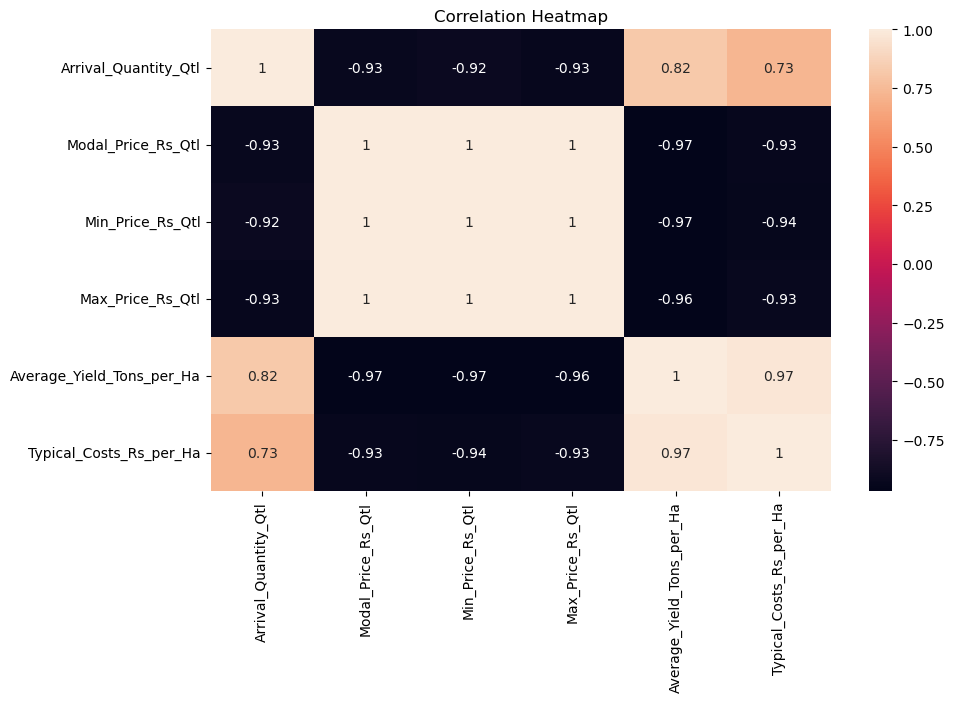

In [5]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [6]:
# === 3. Label Encoding for categorical columns ===

from sklearn.preprocessing import LabelEncoder

cat_cols = ['District', 'APMC_Name', 'Commodity', 'Soil_Type', 'Water_Requirement', 'Season', 'Export_Potential']
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le  # Save encoders for future decoding

In [7]:
# === 4. Define Features & Targets ===

# Features for all models
feature_cols = ['District', 'Soil_Type', 'Water_Requirement', 'Season', 'Arrival_Quantity_Qtl', 'Modal_Price_Rs_Qtl']
X = df[feature_cols]

In [8]:
X

,District,Soil_Type,Water_Requirement,Season,Arrival_Quantity_Qtl,Modal_Price_Rs_Qtl
0,1,0,1,0,2400,4200
1,2,0,0,0,1600,5200
2,0,1,1,1,3200,1600
3,1,1,1,0,1200,5000


In [9]:
# === 4A. Crop Suitability Prediction ===
# Target: Commodity (multiclass classification)

y_crop = df['Commodity']
X_train, X_test, y_train, y_test = train_test_split(X, y_crop, test_size=0.2, random_state=42)

rf_crop = RandomForestClassifier(n_estimators=100, random_state=42)
rf_crop.fit(X_train, y_train)
y_pred_crop = rf_crop.predict(X_test)

print("Crop Suitability Prediction (Classification)")
print(classification_report(y_test, y_pred_crop))

Crop Suitability Prediction (Classification)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklea

In [10]:
# === 4B. Yield Forecast ===
# Target: Average_Yield_Tons_per_Ha (regression)

y_yield = df['Average_Yield_Tons_per_Ha']
X_train, X_test, y_train, y_test = train_test_split(X, y_yield, test_size=0.2, random_state=42)

rf_yield = RandomForestRegressor(n_estimators=100, random_state=42)
rf_yield.fit(X_train, y_train)
y_pred_yield = rf_yield.predict(X_test)

print("\nYield Forecast (Regression)")
print("MSE:", mean_squared_error(y_test, y_pred_yield))


Yield Forecast (Regression)
MSE: 1.1728889999999952


In [11]:
# === 4C. Market Price Forecast ===
# Target: Modal_Price_Rs_Qtl (regression)

y_price = df['Modal_Price_Rs_Qtl']
X_train, X_test, y_train, y_test = train_test_split(X, y_price, test_size=0.2, random_state=42)

rf_price = RandomForestRegressor(n_estimators=100, random_state=42)
rf_price.fit(X_train, y_train)
y_pred_price = rf_price.predict(X_test)

print("\nMarket Price Forecast (Regression)")
print("MSE:", mean_squared_error(y_test, y_pred_price))


Market Price Forecast (Regression)
MSE: 419904.0


In [13]:
# === 4D. Profitability Estimation ===
# Profit = (Yield * Price) - Cost → We'll predict directly profitability

df['Estimated_Profit'] = (df['Average_Yield_Tons_per_Ha'] * df['Modal_Price_Rs_Qtl'] * 10) - df['Typical_Costs_Rs_per_Ha']
df['Estimated_Profit']

0     47400.0
1     58600.0
2    120000.0
3     65000.0
Name: Estimated_Profit, dtype: float64

In [14]:
# Target: Estimated_Profit

y_profit = df['Estimated_Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y_profit, test_size=0.2, random_state=42)

rf_profit = RandomForestRegressor(n_estimators=100, random_state=42)
rf_profit.fit(X_train, y_train)
y_pred_profit = rf_profit.predict(X_test)

print("\nProfitability Estimation (Regression)")
print("MSE:", mean_squared_error(y_test, y_pred_profit))


Profitability Estimation (Regression)
MSE: 3013696.0


In [15]:
# === 4E. Risk/Volatility Assessment ===
# Calculate volatility of price (std dev in recent data)
# Here we'll assume Price_SD column (you can calculate moving std dev later)

df['Price_SD'] = df.groupby('Commodity')['Modal_Price_Rs_Qtl'].transform('std').fillna(0)

In [16]:
# Target: Price_SD (higher → riskier)

y_risk = df['Price_SD']
X_train, X_test, y_train, y_test = train_test_split(X, y_risk, test_size=0.2, random_state=42)

rf_risk = RandomForestRegressor(n_estimators=100, random_state=42)
rf_risk.fit(X_train, y_train)
y_pred_risk = rf_risk.predict(X_test)

print("\nRisk/Volatility Assessment (Regression)")
print("MSE:", mean_squared_error(y_test, y_pred_risk))


Risk/Volatility Assessment (Regression)
MSE: 0.0


# === Save Models ===

import joblib

joblib.dump(rf_crop, 'model_crop_suitability.pkl')
joblib.dump(rf_yield, 'model_yield_forecast.pkl')
joblib.dump(rf_price, 'model_price_forecast.pkl')
joblib.dump(rf_profit, 'model_profit_estimation.pkl')
joblib.dump(rf_risk, 'model_risk_assessment.pkl')

print("\n✅ All models trained and saved!")